# Supervised Learning Evaluation using a GPU
## Behrad Hemati and Emilija Mazuraite

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

import shutil
import random


from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint,EarlyStopping

from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.optimizers import Adam

import os
import shutil
import glob

In [ ]:
base_dir = "/content/drive/MyDrive/data/Garbage classification"
cardboard_dir = os.path.join(base_dir, 'cardboard')
glass_dir = os.path.join(base_dir, 'glass')
metal_dir = os.path.join(base_dir, 'metal')
paper_dir = os.path.join(base_dir, 'paper')
plastic_dir = os.path.join(base_dir, 'plastic')
trash_dir = os.path.join(base_dir, 'trash')

metal_fnames = os.listdir(metal_dir)
cardboard_fnames = os.listdir(cardboard_dir)
glass_fnames = os.listdir(glass_dir)
paper_fnames = os.listdir(paper_dir)
plastic_fnames = os.listdir(plastic_dir)
trash_fnames = os.listdir(trash_dir)


In [ ]:
train_ds = image_dataset_from_directory(
  base_dir,
  validation_split=0.1,
  subset="training",
  seed=123,
  image_size=(512, 384),
  batch_size=32)
val_ds = image_dataset_from_directory(
  base_dir,
  validation_split=0.1,
  subset="validation",
  seed=123,
  image_size=(512, 384),
  batch_size=32)

Found 2527 files belonging to 6 classes.
Using 2275 files for training.
Found 2527 files belonging to 6 classes.
Using 252 files for validation.


In [ ]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
print('total metal images:', len(os.listdir(metal_dir)))
print('total cardboard images:', len(os.listdir(cardboard_dir)))
print('total glass images:', len(os.listdir(glass_dir)))
print('total paper images:', len(os.listdir(paper_dir)))
print('total plastic images:', len(os.listdir(plastic_dir)))
print('total trash images:', len(os.listdir(trash_dir)))


total metal images: 410
total cardboard images: 403
total glass images: 501
total paper images: 594
total plastic images: 482
total trash images: 137


(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)
(384, 512, 3)


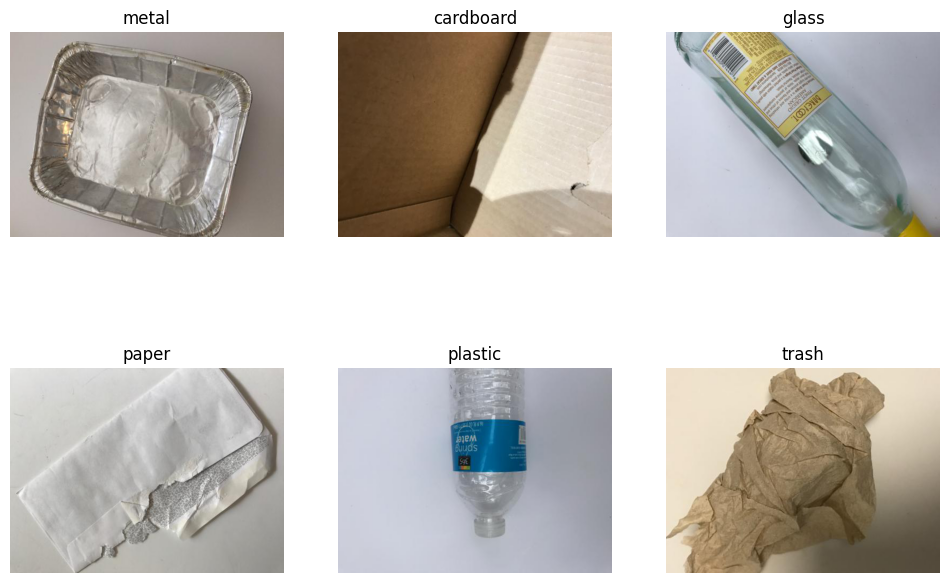

In [ ]:
%matplotlib inline

nrows = 2
ncols = 3

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

next_metal_pix = [os.path.join(metal_dir, fname) for fname in metal_fnames[pic_index : pic_index + 1]]
next_cardboard_pix = [os.path.join(cardboard_dir, fname) for fname in cardboard_fnames[pic_index : pic_index + 1]]
next_glass_pix = [os.path.join(glass_dir, fname) for fname in glass_fnames[pic_index : pic_index + 1]]
next_paper_pix = [os.path.join(paper_dir, fname) for fname in paper_fnames[pic_index : pic_index + 1]]
next_plastic_pix = [os.path.join(plastic_dir, fname) for fname in plastic_fnames[pic_index : pic_index + 1]]
next_trash_pix = [os.path.join(trash_dir, fname) for fname in trash_fnames[pic_index : pic_index + 1]]

class_labels = [ 'metal', 'cardboard', 'glass', 'paper', 'plastic','trash']

for i, img_path in enumerate(next_metal_pix + next_cardboard_pix + next_glass_pix + next_paper_pix + next_plastic_pix + next_trash_pix):
    sp = plt.subplot(nrows, ncols, i + 1 )
    sp.axis('Off')  # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

    label = class_labels[i]
    sp.set_title(label)  # Set the title as the class label

    print(img.shape)

plt.show()


# Reorganizing the dataset and splitting into test/validation/training subsets

In [ ]:
# # Now split the datasets into training, test, and validation subsets
# # Use 10 10 80 split


# #Define the destination directories for training, test, and validation:
# train_dir = 'combined_dataset/train'
# test_dir = 'combined_dataset/test'
# val_dir = 'combined_dataset/validation'

# #Create the destination directories
# os.makedirs(train_dir, exist_ok=True)
# os.makedirs(test_dir, exist_ok=True)
# os.makedirs(val_dir, exist_ok=True)

# split_ratio = 0.1  # 10% for test and validation


In [ ]:
# classes = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

# for class_name in classes:
#     source_dir = os.path.join(base_dir, class_name)
#     files = os.listdir(source_dir)
#     random.shuffle(files)  # Randomize the order of files

#     num_files = len(files)
#     num_test = int(num_files * split_ratio)
#     num_val = int(num_files * split_ratio)
#     num_train = num_files - num_test - num_val

#     test_files = files[:num_test]
#     val_files = files[num_test:num_test+num_val]
#     train_files = files[num_test+num_val:]

#     # Copy files to the respective directories
#     for file in test_files:
#         src = os.path.join(source_dir, file)
#         dst = os.path.join(test_dir, file)
#         shutil.copyfile(src, dst)

#     for file in val_files:
#         src = os.path.join(source_dir, file)
#         dst = os.path.join(val_dir, file)
#         shutil.copyfile(src, dst)

#     for file in train_files:
#         src = os.path.join(source_dir, file)
#         dst = os.path.join(train_dir, file)
#         shutil.copyfile(src, dst)

Group the images by class:
Please note that the data_dir and output_dir have to be altered manually in the code

In [ ]:


# # Directory containing the images
# data_dir = train_dir

# # Directory to store the split data
# output_dir = train_dir




In [ ]:
# # List of class names
# classes = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

# # Iterate over each class
# for class_name in classes:
#     # Get a list of all files in the data directory that match the pattern for the current class
#     file_list = glob.glob(os.path.join(data_dir, class_name + '*.jpg'))

#     # Create subdirectory for the current class in the output directory
#     class_dir = os.path.join(output_dir, class_name)
#     os.makedirs(class_dir, exist_ok=True)

#     # Move files to the class subdirectory
#     for file_path in file_list:
#         file_name = os.path.basename(file_path)
#         dst_path = os.path.join(class_dir, file_name)
#         shutil.move(file_path, dst_path)

# Convolutional Neural Network


In [ ]:
# train_datagen = ImageDataGenerator(horizontal_flip=True,
#                                    vertical_flip=True,
#                                    rescale=1./255)
# val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)

# train_generator = train_datagen.flow_from_directory(
#         train_dir,               # This is the source directory for training images
#         target_size=(384, 512),
#         batch_size=32,
#         class_mode='categorical',
#         subset='training')

# validation_generator = val_datagen.flow_from_directory(
#         val_dir,
#         target_size=(384, 512),
#         batch_size=32,
#         class_mode='categorical', subset='validation')

In [ ]:
# Our input feature map is 382x510x3: 382x510 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(512, 384, 3))

num_classes = 6

# 1 convolution:---- layers.Conv2D(32, 3, activat----------------------------
# 32 3x3 filters
# max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# 2 convolution -------------------------------
# 32 3x3 filters
x = layers.Conv2D(64, 3, activation='relu')(x)
# max-pooling layer with a 2x2 window
x = layers.MaxPooling2D(2)(x)

# 3 convolution:-----------------------------
#  64 3x3 filters that are
x = layers.Conv2D(128, 3, activation='relu')(x)
# max-pooling layer with a 2x2 window
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(256, 3, activation='relu')(x)
# max-pooling layer with a 2x2 window
x = layers.MaxPooling2D(2)(x)

# The Flatten layer is used to convert the input tensor into a 1-dimensional
# (1D) array
x = layers.Flatten()(x)

# create a fully connected (dense) layer with 512 units and
# apply the ReLU activation function to its outputs
x = layers.Dense(512, activation='relu')(x)

# apply dropout regularization to the input x
x = layers.Dropout(0.5)(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(num_classes, activation='softmax')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully
# connected layer + sigmoid output layer
model = Model(img_input, output)
# filepath="trained_model.h5"
# checkpoint1 = ModelCheckpoint(filepath,save_freq="epoch", monitor='acc', verbose=1, save_best_only=True, mode='max')
# callbacks_list = [checkpoint1]

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 512, 384, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 510, 382, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 255, 191, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 253, 189, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 126, 94, 64)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 92, 128)      73856 

In [ ]:
model_save = tf.keras.callbacks.ModelCheckpoint('./best_weights.h5',
                             save_best_only = True,
                             save_weights_only = True,
                             monitor = 'accuracy',
                             verbose = 1)
early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'accuracy',
                           verbose = 1,
                           baseline=.92,
                           patience=10,
                           restore_best_weights = True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', factor = 0.3,
                              patience = 2, min_delta = 0.001,
                              verbose = 1)

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=Adam(lr = 0.001),
              metrics=['accuracy'])
import time

start = time.time()

history = model.fit(
      train_ds,
      epochs=30,
      validation_data=val_ds,
      verbose=2,
      workers=8,
      shuffle=True,
      callbacks=[model_save])

end = time.time()

Epoch 1/30

Epoch 1: accuracy improved from 0.24440 to 0.34110, saving model to ./best_weights.h5
72/72 - 23s - loss: 2.0723 - accuracy: 0.3411 - val_loss: 1.7550 - val_accuracy: 0.2817 - 23s/epoch - 322ms/step
Epoch 2/30

Epoch 2: accuracy improved from 0.34110 to 0.43165, saving model to ./best_weights.h5
72/72 - 20s - loss: 1.4053 - accuracy: 0.4316 - val_loss: 2.0626 - val_accuracy: 0.2857 - 20s/epoch - 275ms/step
Epoch 3/30

Epoch 3: accuracy improved from 0.43165 to 0.50286, saving model to ./best_weights.h5
72/72 - 22s - loss: 1.2482 - accuracy: 0.5029 - val_loss: 2.0707 - val_accuracy: 0.2937 - 22s/epoch - 302ms/step
Epoch 4/30

Epoch 4: accuracy improved from 0.50286 to 0.57582, saving model to ./best_weights.h5
72/72 - 19s - loss: 1.0871 - accuracy: 0.5758 - val_loss: 2.1802 - val_accuracy: 0.3056 - 19s/epoch - 270ms/step
Epoch 5/30

Epoch 5: accuracy improved from 0.57582 to 0.65143, saving model to ./best_weights.h5
72/72 - 21s - loss: 1.0157 - accuracy: 0.6514 - val_loss: 

In [ ]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');


In [ ]:
history_cnn = {'loss': [2.0723090171813965,
  1.40529465675354,
  1.2481592893600464,
  1.0870680809020996,
  1.0156819820404053,
  0.7787120938301086,
  0.657892107963562,
  0.5144342184066772,
  2.714341402053833,
  2.4937222003936768,
  0.8449305295944214,
  0.553156316280365,
  0.4536496102809906,
  0.36918190121650696,
  0.3304932415485382,
  0.28376972675323486,
  0.307146817445755,
  0.5628796219825745,
  0.41547855734825134,
  0.29650256037712097,
  0.2395615130662918,
  0.24980489909648895,
  0.22070521116256714,
  0.21986357867717743,
  0.23125824332237244,
  0.1693192720413208,
  0.13453495502471924,
  0.2890949845314026,
  0.7699925899505615,
  0.9171435236930847],
 'accuracy': [0.3410989046096802,
  0.4316483438014984,
  0.5028571486473083,
  0.5758242011070251,
  0.6514285802841187,
  0.6980219483375549,
  0.7534065842628479,
  0.8013187050819397,
  0.5362637639045715,
  0.41010987758636475,
  0.6874725222587585,
  0.800000011920929,
  0.8404395580291748,
  0.8681318759918213,
  0.8936263918876648,
  0.9063736200332642,
  0.901098906993866,
  0.8821977972984314,
  0.876043975353241,
  0.9098901152610779,
  0.9204395413398743,
  0.923956036567688,
  0.9389011263847351,
  0.9318681359291077,
  0.9301099181175232,
  0.9472527503967285,
  0.9547252655029297,
  0.9221978187561035,
  0.8312087655067444,
  0.825054943561554],
 'val_loss': [1.755026936531067,
  2.0626349449157715,
  2.070734739303589,
  2.180232048034668,
  2.4052734375,
  3.235274076461792,
  3.7214486598968506,
  5.059016704559326,
  2.097212553024292,
  2.7602133750915527,
  3.853513717651367,
  3.5915579795837402,
  4.806027889251709,
  5.075658321380615,
  5.013676643371582,
  6.962706089019775,
  7.7320876121521,
  5.121423244476318,
  5.048467636108398,
  5.9050679206848145,
  6.426584243774414,
  6.672543525695801,
  6.28968620300293,
  5.651197910308838,
  6.576148986816406,
  7.320785045623779,
  8.43906021118164,
  7.769284248352051,
  4.71207857131958,
  5.56260347366333],
 'val_accuracy': [0.2817460298538208,
  0.2857142984867096,
  0.2936508059501648,
  0.3055555522441864,
  0.3333333432674408,
  0.3214285671710968,
  0.3333333432674408,
  0.329365074634552,
  0.2698412835597992,
  0.30158731341362,
  0.3134920597076416,
  0.329365074634552,
  0.3373015820980072,
  0.3730158805847168,
  0.3769841194152832,
  0.369047611951828,
  0.3769841194152832,
  0.3849206268787384,
  0.380952388048172,
  0.3650793731212616,
  0.380952388048172,
  0.3611111044883728,
  0.3849206268787384,
  0.3849206268787384,
  0.380952388048172,
  0.3769841194152832,
  0.3650793731212616,
  0.3214285671710968,
  0.3452380895614624,
  0.3730158805847168]}

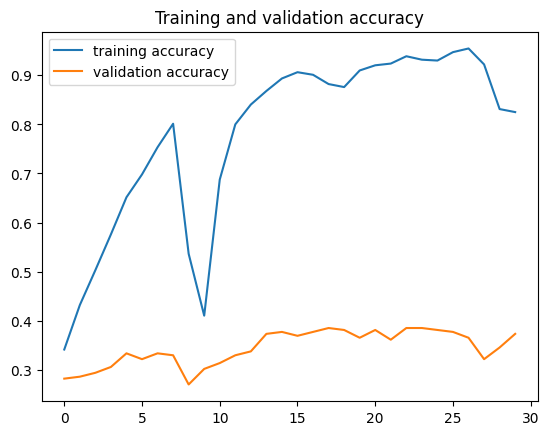

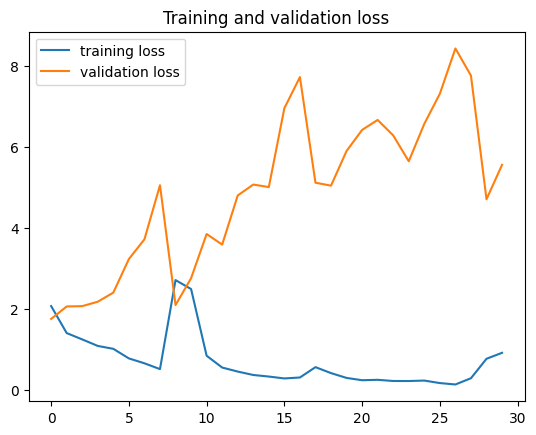

In [ ]:
 # Accuracy scores
# Use the history object to recover accuracy results for the
# training and validation subsets
acc = history_cnn.history['accuracy']
val_acc = history_cnn.history['val_accuracy']

# Loss function value
# Use the history object to recover loss results for the
# training and validation subsets
loss = history_cnn.history['loss']
val_loss = history_cnn.history['val_loss']

# Create a vector storing the epochs
epochs = range(len(acc))

# Accuracy plot
plt.plot(epochs, acc, label='training accuracy')
plt.plot(epochs, val_acc, label='validation accuracy')
# plt.plot(epochs, label='validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

# Loss plot
plt.figure()
plt.plot(epochs, loss, label='training loss')
plt.plot(epochs, val_loss, label='validation loss')
# plt.plot(epochs, label='validation loss')
plt.title('Training and validation loss')
plt.legend()


In [ ]:
history.history

{'loss': [2.0723090171813965,
  1.40529465675354,
  1.2481592893600464,
  1.0870680809020996,
  1.0156819820404053,
  0.7787120938301086,
  0.657892107963562,
  0.5144342184066772,
  2.714341402053833,
  2.4937222003936768,
  0.8449305295944214,
  0.553156316280365,
  0.4536496102809906,
  0.36918190121650696,
  0.3304932415485382,
  0.28376972675323486,
  0.307146817445755,
  0.5628796219825745,
  0.41547855734825134,
  0.29650256037712097,
  0.2395615130662918,
  0.24980489909648895,
  0.22070521116256714,
  0.21986357867717743,
  0.23125824332237244,
  0.1693192720413208,
  0.13453495502471924,
  0.2890949845314026,
  0.7699925899505615,
  0.9171435236930847],
 'accuracy': [0.3410989046096802,
  0.4316483438014984,
  0.5028571486473083,
  0.5758242011070251,
  0.6514285802841187,
  0.6980219483375549,
  0.7534065842628479,
  0.8013187050819397,
  0.5362637639045715,
  0.41010987758636475,
  0.6874725222587585,
  0.800000011920929,
  0.8404395580291748,
  0.8681318759918213,
  0.8936

In [ ]:
print(end - start)

677.5679974555969


['metal', 'paper', 'cardboard', 'plastic', 'trash', 'glass']
Label: cardboard (Class No: 0)


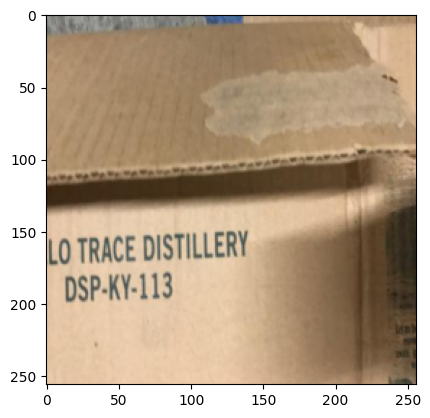

In [ ]:
import os
import torch
import torchvision
from torch.utils.data import random_split
import torchvision.models as models
import torch.nn as nn
import torch.nn.functional as F
data_dir  = "/content/drive/MyDrive/data/Garbage classification"

classes = os.listdir(data_dir)
print(classes)
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms

transformations = transforms.Compose([transforms.Resize((256, 256)), transforms.ToTensor()])

dataset = ImageFolder(data_dir, transform = transformations)
import matplotlib.pyplot as plt
%matplotlib inline

def show_sample(img, label):
    print("Label:", dataset.classes[label], "(Class No: "+ str(label) + ")")
    plt.imshow(img.permute(1, 2, 0))
img, label = dataset[12]
show_sample(img, label)

In [ ]:
random_seed = 42
torch.manual_seed(random_seed)
train_ds, val_ds, test_ds = random_split(dataset, [1593, 176, 758])
len(train_ds), len(val_ds), len(test_ds)

(1593, 176, 758)

In [ ]:
from torch.utils.data.dataloader import DataLoader
batch_size = 32
train_dl = DataLoader(train_ds, batch_size, shuffle = True, num_workers = 4, pin_memory = True)
val_dl = DataLoader(val_ds, batch_size*2, num_workers = 4, pin_memory = True)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


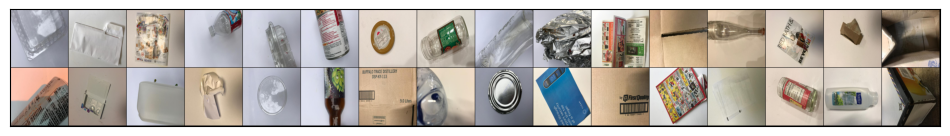

In [ ]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images, nrow = 16).permute(1, 2, 0))
        break
show_batch(train_dl)

In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch {}: train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch+1, result['train_loss'], result['val_loss'], result['val_acc']))

class ResNet(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        # Use a pretrained model
        self.network = models.resnet50(pretrained=True)
        # Replace last layer
        num_ftrs = self.network.fc.in_features
        self.network.fc = nn.Linear(num_ftrs, len(dataset.classes))

    def forward(self, xb):
        return torch.sigmoid(self.network(xb))

model = ResNet()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 133MB/s]


In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)
device = get_default_device()
device

device(type='cuda')

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device)

ResNet(
  (network): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (

In [ ]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:
model = to_device(ResNet(), device)


In [ ]:
evaluate(model, val_dl)

{'val_loss': 1.8006808757781982, 'val_acc': 0.1371527761220932}

In [ ]:
num_epochs = 8
opt_func = torch.optim.Adam
lr = 5.5e-5
start = time.time()
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)
end = time.time()
print (end - start)

Epoch 1: train_loss: 1.4673, val_loss: 1.2805, val_acc: 0.8212
Epoch 2: train_loss: 1.1895, val_loss: 1.1708, val_acc: 0.9080
Epoch 3: train_loss: 1.0952, val_loss: 1.1408, val_acc: 0.9149
Epoch 4: train_loss: 1.0726, val_loss: 1.1251, val_acc: 0.9444
Epoch 5: train_loss: 1.0637, val_loss: 1.1275, val_acc: 0.9444
Epoch 6: train_loss: 1.0622, val_loss: 1.1181, val_acc: 0.9531
Epoch 7: train_loss: 1.0582, val_loss: 1.1009, val_acc: 0.9583
Epoch 8: train_loss: 1.0555, val_loss: 1.1086, val_acc: 0.9462
189.81792855262756


In [ ]:
history

[{'val_loss': 1.2805488109588623,
  'val_acc': 0.8211805820465088,
  'train_loss': 1.467288613319397},
 {'val_loss': 1.1707991361618042,
  'val_acc': 0.9079861044883728,
  'train_loss': 1.1895405054092407},
 {'val_loss': 1.1408337354660034,
  'val_acc': 0.9149305820465088,
  'train_loss': 1.0952335596084595},
 {'val_loss': 1.1250946521759033,
  'val_acc': 0.9444444179534912,
  'train_loss': 1.0726242065429688},
 {'val_loss': 1.1275228261947632,
  'val_acc': 0.9444444179534912,
  'train_loss': 1.063706398010254},
 {'val_loss': 1.1181206703186035,
  'val_acc': 0.953125,
  'train_loss': 1.0622308254241943},
 {'val_loss': 1.1009008884429932,
  'val_acc': 0.9583333134651184,
  'train_loss': 1.0582215785980225},
 {'val_loss': 1.1085501909255981,
  'val_acc': 0.9461805820465088,
  'train_loss': 1.0555453300476074}]

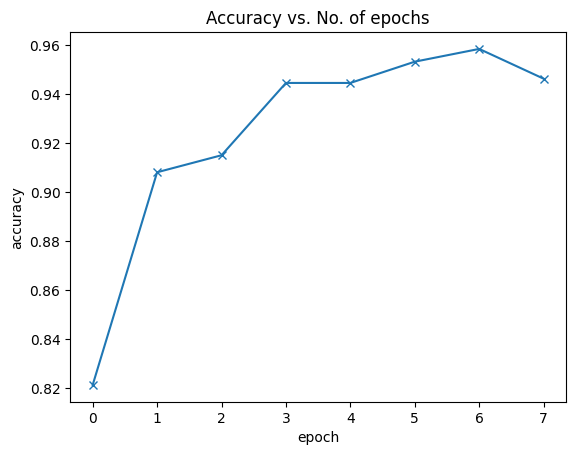

In [ ]:

plot_accuracies(history)

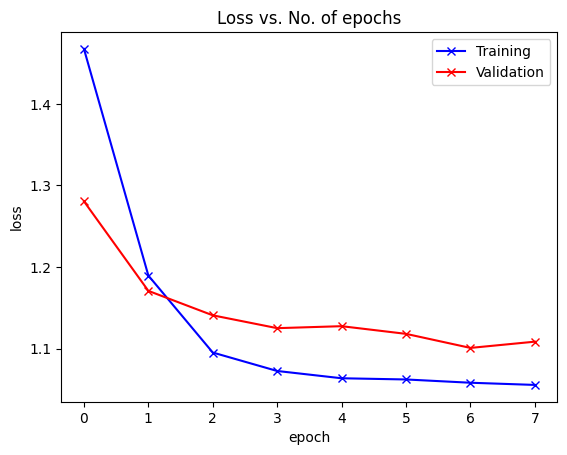

In [ ]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

plot_losses(history)